In [76]:
import pandas as pd
import glob

In [77]:
csv_files=glob.glob("data/*.csv")

In [78]:
df=pd.concat((pd.read_csv(f)for f in csv_files),ignore_index=True)

In [79]:
print("Combined Data Shape:", df.shape)
df.head()


Combined Data Shape: (5743278, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6F1682AC40EB6F71,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,NaN,NaN,NaN,NaN,41.91,-87.69,41.91,-87.70,member
1,622A1686D64948EB,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,NaN,NaN,NaN,NaN,41.94,-87.65,41.94,-87.65,member
2,3C88859D926253B4,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,NaN,NaN,NaN,NaN,41.95,-87.68,41.92,-87.63,member
3,EAD8A5E0259DEC88,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,NaN,NaN,NaN,NaN,41.99,-87.65,41.98,-87.66,member
4,5A36F21930D6A55C,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,NaN,NaN,NaN,NaN,41.98,-87.66,41.99,-87.65,member


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743278 entries, 0 to 5743277
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 569.6+ MB


In [81]:
df.describe(include='all')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,5743278,5743278,5743278,5743278,4838041,4838041,4786699,4786699,5.743278e+06,5.743278e+06,5.735594e+06,5.735594e+06,5743278
unique,5743278,3,4841289,4852976,1645,1610,1658,1623,NaN,NaN,NaN,NaN,2
top,6F1682AC40EB6F71,electric_bike,2023-07-13 17:38:08,2023-12-08 09:54:28,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member
freq,1,2864195,8,18,64223,64223,64619,64619,NaN,NaN,NaN,NaN,3693789
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190292e+01,-8.764680e+01,4.190325e+01,-8.764697e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.514061e-02,2.728732e-02,5.447490e-02,6.906322e-02,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188096e+01,-8.766000e+01,4.188103e+01,-8.766013e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.189897e+01,-8.764375e+01,4.189993e+01,-8.764404e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.193000e+01,-8.762979e+01,4.193059e+01,-8.762991e+01,NaN


In [82]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    905237
start_station_id      905237
end_station_name      956579
end_station_id        956579
start_lat                  0
start_lng                  0
end_lat                 7684
end_lng                 7684
member_casual              0
dtype: int64

In [83]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])


In [84]:
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


In [85]:
df = df[df['ride_length'] > 0]


In [96]:
df['day_of_week'] = df['started_at'].dt.day_name()
df['month'] = df['started_at'].dt.month_name()
df['hour'] = df['started_at'].dt.hour


In [98]:
print(df.shape)
df[['started_at', 'ended_at', 'ride_length', 'day_of_week', 'month', 'hour']].head()


(5741472, 17)


,started_at,ended_at,ride_length,day_of_week,month,hour
0,2023-06-05 13:34:12,2023-06-05 14:31:56,57.733333,Monday,June,13
1,2023-06-05 01:30:22,2023-06-05 01:33:06,2.733333,Monday,June,1
2,2023-06-20 18:15:49,2023-06-20 18:32:05,16.266667,Tuesday,June,18
3,2023-06-19 14:56:00,2023-06-19 15:00:35,4.583333,Monday,June,14
4,2023-06-19 15:03:34,2023-06-19 15:07:16,3.700000,Monday,June,15


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\UMAR\AppData\Local\Temp\ipykernel_8752\1087428976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_counts.index, y=user_counts.values, palette='Set2')


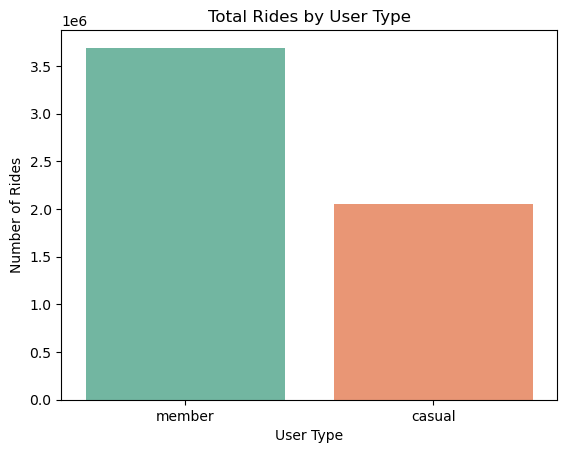

In [102]:
user_counts = df['member_casual'].value_counts()

sns.barplot(x=user_counts.index, y=user_counts.values, palette='Set2')
plt.title("Total Rides by User Type")
plt.xlabel("User Type")
plt.ylabel("Number of Rides")
plt.show()


In [ ]:
avg_ride_length = df.groupby('member_casual')['ride_length'].mean().reset_index()

sns.barplot(data=avg_ride_length, x='member_casual', y='ride_length', palette='pastel')
plt.title("Average Ride Length (Minutes) by User Type")
plt.xlabel("User Type")
plt.ylabel("Average Ride Length (min)")
plt.show()

<Axes: xlabel='member_casual', ylabel='ride_length'>

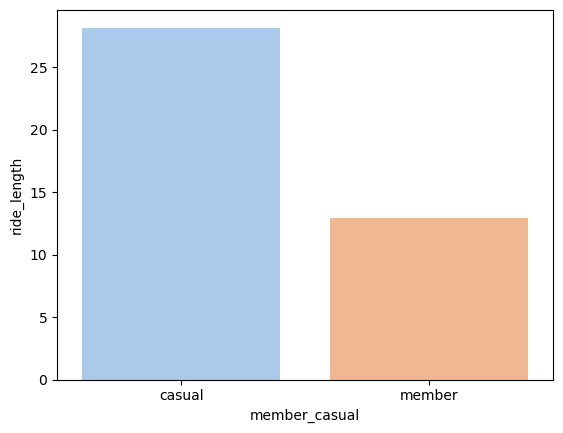

In [108]:
sns.barplot(data=avg_ride_length, x='member_casual', y='ride_length', hue='member_casual', palette='pastel', legend=False)

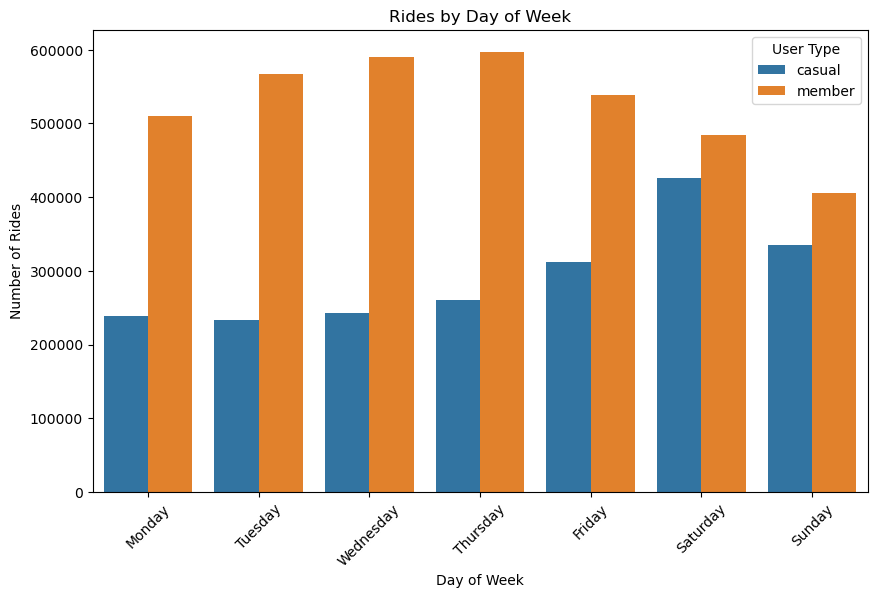

In [110]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df.groupby(['day_of_week', 'member_casual'])['ride_id'].count().reset_index()
day_counts.columns = ['day_of_week', 'user_type', 'ride_count']

plt.figure(figsize=(10,6))
sns.barplot(data=day_counts, x='day_of_week', y='ride_count', hue='user_type', order=order)
plt.title("Rides by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.show()


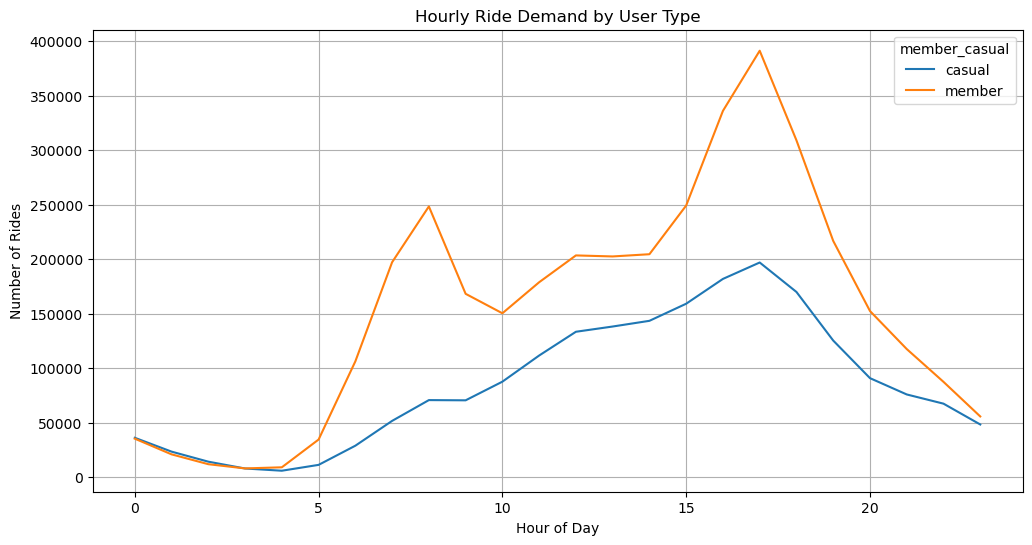

In [112]:
hourly = df.groupby(['hour', 'member_casual'])['ride_id'].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly, x='hour', y='ride_id', hue='member_casual')
plt.title("Hourly Ride Demand by User Type")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.grid(True)
plt.show()


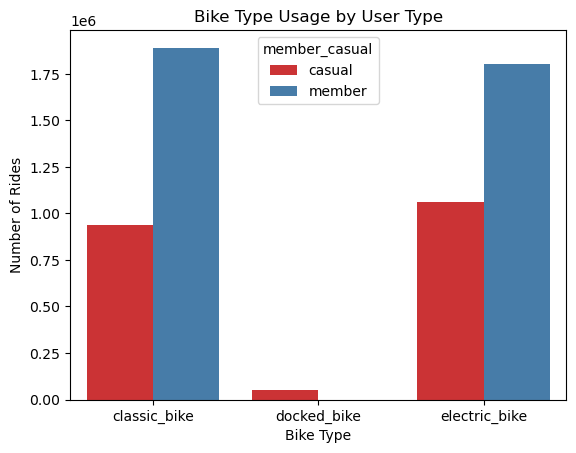

In [114]:
bike_type = df.groupby(['rideable_type', 'member_casual'])['ride_id'].count().reset_index()

sns.barplot(data=bike_type, x='rideable_type', y='ride_id', hue='member_casual', palette='Set1')
plt.title("Bike Type Usage by User Type")
plt.xlabel("Bike Type")
plt.ylabel("Number of Rides")
plt.show()
